  <font color=gray>Este dataset __cifar10__ es un conjunto de 60.000 imagenes de 32X32 usado para el Computer Vision con 10 clases de objetos a color el cual cada uno contiene 6.000 imgs. [https://www.kaggle.com/c/cifar-10/data]</font>

In [1]:
# Paso 1 & 2 Instalación e Importación dedependencias
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.1.0'

In [2]:
# Paso 3 : Pre procesado de datos
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 192s 1us/step


In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# Tridimensional
X_train.shape

(50000, 32, 32, 3)

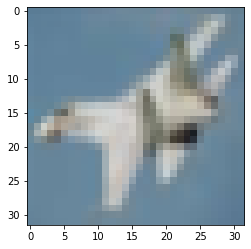

In [6]:
plt.imshow(X_test[10])

In [7]:
y_test[10]

array([0], dtype=uint8)

In [8]:
# Paso 4 Construir una red neuronal convolucional
# definir el modelo como instancia de la clase Sequential
model = tf.keras.models.Sequential()

**Hyper parámetros de la capa de la RNC:**

    Filtros: 32
    Tamaño del kernel: 3
    padding: same
    Función de Activación: relu
    input_shape: (32, 32, 3)


 <font color=gray>Capa convolucional, **32 filtros**, con **3 puntos horizontal y vertical**
El **kernel** nos permite hacer la media, la ponderación la convolución o producto convolucional del quernel con la capa
de la imagen, **padding** es el margen con respecto a los bordes para que el filtro pase por las pocisiones y tome mas o
menos el mismo valor => [https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow]. **En el input shape** ya no se recibe un vector son imagenes de 32X32 por 3 canales de color (RGB)</font>

In [9]:
# Capa 1 : Input
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

**Hyper parámetros de la capa de la RNC:**

    Filtros: 32
    Tamaño del kernel: 3
    padding: same
    Función de Activación: relu


**Hyper parámetros de la capa de MaxPool:**

    pool_size: 2
    strides: 2
    padding: valid

<font color=gray>MaxPooling moviendo 2 pocisiones en horizontal y vertical en una ventana, se va a quedar con el valor mas alto, despues de aplicar la convolución, el Maxpooling reducira el tamaño de la imagen. **IMPORTANTE** En consecuencia de como se comporta el paddin en la Conv2d (tomando un conjunto de 0roz)  es posible que se pierdan datos allí, por eso MaxPool2D tomara los valores (los rasgos mas may) para la convolución **por medio de un padding valido** </font> 

In [10]:
# Capa 2 : Capa convolucional Conv2D de padding same y la Capa convolucional MaxPool2D padding valido
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [11]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

**Hyper parámetros de la capa de la RNC:**

    Filtros: 64
    Tamaño del kernel: 3
    padding: same
    Función de Activación: relu (Rectificadora lineal unitaria)
 
Argumentos:

    pool_size: entero o tupla de 2 enteros, factores por los cuales reducir la escala (vertical, horizontal). (2, 2) reducirá a la mitad la entrada en ambas dimensiones espaciales. Si solo se especifica un número entero, se utilizará la misma longitud de ventana para ambas dimensiones.
    zancadas: entero, tupla de 2 enteros o ninguno. Strides valores. Si ninguno, por defecto será pool_size.
    relleno: uno de 'válido' o 'igual' (no distingue entre mayúsculas y minúsculas).


In [12]:
# Capa 3 :  Capa convolucional con el doble de filtros
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

**Añadir la cuarta capa convolucional y la capa de max-pooling**

Hyper parámetros de la capa de la RNC:

    Filtros: 64
    Tamaño del kernel: 3
    padding: same
    Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:

    pool_size: 2
    strides: 2
    padding: valid


In [13]:
# Capa 4 : Capa convolucional Conv2D de padding same y la Capa convolucional MaxPool2D padding valido
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

**Añadir la capa de flattening**

<font color=gray>Sigue siendo una imagen 2d con tres canales de color, por eso FLatten() aplana las imagenes, las convierte en un vector de datos aplanados, una vez que han sido filtrados y reducidos, esta sera la capa de entrada de una red neuronal **totalmente conectada por tanto la fase de convolución es un añadido que se le coloca a una red neuronal artificial antes de la entrada, para contruir a partir de las imagenes sus convoluciones y aplanar ese resultado para que sea la entrada.**</font>

In [15]:
model.add(tf.keras.layers.Flatten())

**Añadir la primera capa fully-connected**

Hyper parámetros de la capa totalmente conectada:

    units/neurons: 128
    activation: relu


In [16]:
# Capa 5 : RNA totalmente conectada 
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Añadir la capa de salida**

Hyper parámetros de la capa totalmente conectada:

    units/neurons: 10 (number of classes)
    activation: softmax


In [17]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

<font color=gray>Compilar el modelos arse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción. El **optimizador** es la herramienta que nos permite llevar a cabo el gradiende de descenso estocastico, que actualiza los pesos cada vez que hace una propagación hacia atras. Que ademas reduce la perdida: es  el error entre la predicción del modelo y el dato original.
https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy</font>

In [19]:
# Comilando el modelo.
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'] )

In [20]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs = 5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 145s 3ms/sample - loss: 1.3579 - sparse_categorical_accuracy: 0.5115
Epoch 2/5
50000/50000 [==============================] - 147s 3ms/sample - loss: 0.8992 - sparse_categorical_accuracy: 0.6850
Epoch 3/5
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.7324 - sparse_categorical_accuracy: 0.7452
Epoch 4/5
50000/50000 [==============================] - 150s 3ms/sample - loss: 0.6173 - sparse_categorical_accuracy: 0.7832
Epoch 5/5
50000/50000 [==============================] - 151s 3ms/sample - loss: 0.5106 - sparse_categorical_accuracy: 0.8206s - loss: 0.5105 - sparse_categorical_accuracy - ETA: 4s - loss:


In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 7s 657us/sample - loss: 0.7694 - sparse_categorical_accuracy: 0.7420


In [22]:
print("Test Accuracy: {}".format(test_accuracy))

Test Accuracy: 0.7419999837875366
